In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df = train_df[["Id", "MSZoning", "Street", "Alley", "Neighborhood", "Condition1", "Condition2", "LotArea", "1stFlrSF", "2ndFlrSF", 
                     "GrLivArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","MoSold","OpenPorchSF","EnclosedPorch"
                     ,"3SsnPorch","ScreenPorch","MiscFeature","WoodDeckSF","Heating","HeatingQC","CentralAir","Electrical",
                     "FireplaceQu","GarageQual","GarageCond","GarageCars","TotRmsAbvGrd","BsmtFullBath","BsmtHalfBath","FullBath",
                     "HalfBath","ExterQual","ExterCond","PoolQC","Foundation", "SalePrice"]]
test_df = test_df[["Id", "MSZoning", "Street", "Alley", "Neighborhood", "Condition1", "Condition2", "LotArea", "1stFlrSF", "2ndFlrSF", 
                     "GrLivArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","MoSold","OpenPorchSF","EnclosedPorch"
                     ,"3SsnPorch","ScreenPorch","MiscFeature","WoodDeckSF","Heating","HeatingQC","CentralAir","Electrical",
                     "FireplaceQu","GarageQual","GarageCond","GarageCars","TotRmsAbvGrd","BsmtFullBath","BsmtHalfBath","FullBath",
                     "HalfBath","ExterQual","ExterCond","PoolQC","Foundation"]]
combine = [train_df, test_df]
# train_df.head()

In [4]:
# train_df.isnull().sum()

In [5]:
# freq_Alley = train_df.Alley.dropna().mode()[0]
# train_df.Alley.value_counts()

In [6]:
# unko = train_df.dropna()
# unko = unko.replace({'Pave': 1, 'Grvl': 0})
# unko.head()

In [7]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(unko.corr(), linewidths=0.1,vmax=1.0,  square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
train_df['Alley'].fillna('Na', inplace=True)
test_df['Alley'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].map({'Grvl': 0, 'Pave': 1, 'Na': 2})

In [9]:
# test_df.isnull().sum()

In [10]:
# test_df.MSZoning.value_counts()

In [11]:
freq = test_df.MSZoning.dropna().mode()[0]
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq)

In [12]:
# test_df.isnull().sum()

In [13]:
train_df.replace({'Pave': 1, 'Grvl': 0},inplace=True)
test_df.replace({'Pave': 1, 'Grvl': 0},inplace=True)
# train_df.head()

In [14]:
for dataset in combine:
    dataset['Newness'] = (2019 - dataset['YearRemodAdd']) + (2019 - dataset['YearBuilt'])
    
train_df = train_df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
test_df = test_df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
combine = [train_df, test_df]
# train_df.head()

In [15]:
for dataset in combine:
    dataset['Quality'] = dataset['OverallQual'] * dataset['OverallCond']

train_df = train_df.drop(['OverallQual', 'OverallCond'], axis=1)
test_df = test_df.drop(['OverallQual', 'OverallCond'], axis=1)
combine = [train_df, test_df]

In [16]:
# test_df.head()

In [17]:
for dataset in combine:
    dataset['HouseSize'] = dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['GrLivArea']
    
train_df = train_df.drop(['1stFlrSF', '2ndFlrSF','GrLivArea'], axis=1)
test_df = test_df.drop(['1stFlrSF', '2ndFlrSF','GrLivArea'], axis=1)
combine = [train_df, test_df]

In [18]:
# test_df.head()

In [19]:
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].map({'A': 0, 'C (all)': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7})
    dataset['Neighborhood'] = dataset['Neighborhood'].map({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5
                                                          , 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NoRidge': 13
                                                          , 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 
                                                           'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24})

In [20]:
# train_df.head()
# train_df.Neighborhood.value_counts()

In [21]:
for dataset in combine:
    dataset['toArtery'] = 0
    dataset.loc[dataset['Condition1'] == 'Artery', 'toArtery'] = 1
    dataset.loc[dataset['Condition2'] == 'Artery', 'toArtery'] = 1
    
    dataset['toFeedr'] = 0
    dataset.loc[dataset['Condition1'] == 'Feedr', 'toFeedr'] = 1
    dataset.loc[dataset['Condition2'] == 'Feedr', 'toFeedr'] = 1
    
    dataset['isNorm'] = 0
    dataset.loc[dataset['Condition1'] == 'Norm', 'isNorm'] = 1
    dataset.loc[dataset['Condition2'] == 'Norm', 'isNorm'] = 1
    
    dataset['isRRNn'] = 0
    dataset.loc[dataset['Condition1'] == 'RRNn', 'isRRNn'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNn', 'isRRNn'] = 1
    
    dataset['isRRAn'] = 0
    dataset.loc[dataset['Condition1'] == 'RRAn', 'isRRAn'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAn', 'isRRAn'] = 1
    
    dataset['isPosN'] = 0
    dataset.loc[dataset['Condition1'] == 'PosN', 'isPosN'] = 1
    dataset.loc[dataset['Condition2'] == 'PosN', 'isPosN'] = 1
    
    dataset['isPosA'] = 0
    dataset.loc[dataset['Condition1'] == 'PosA', 'isPosA'] = 1
    dataset.loc[dataset['Condition2'] == 'PosA', 'isPosA'] = 1
    
    dataset['isRRNe'] = 0
    dataset.loc[dataset['Condition1'] == 'RRNe', 'isRRNe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNe', 'isRRNe'] = 1
    
    dataset['isRRAe'] = 0
    dataset.loc[dataset['Condition1'] == 'RRAe', 'isRRAe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAe', 'isRRAe'] = 1
    
train_df = train_df.drop(['Condition1', 'Condition2'], axis=1)
test_df = test_df.drop(['Condition1', 'Condition2'], axis=1)
combine = [train_df, test_df]

pd.set_option('display.max_columns', 81)
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,GarageQual,GarageCond,GarageCars,TotRmsAbvGrd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,ExterQual,ExterCond,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,8450,2,61,0,0,0,NaN,0,GasA,Ex,Y,SBrkr,NaN,TA,TA,2,8,1,0,2,1,Gd,TA,NaN,PConc,208500,32,35,3420,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,9600,5,0,0,0,0,NaN,298,GasA,Ex,Y,SBrkr,TA,TA,TA,2,6,0,1,2,0,TA,TA,NaN,CBlock,181500,86,48,2524,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,11250,9,42,0,0,0,NaN,0,GasA,Ex,Y,SBrkr,TA,TA,TA,2,6,1,0,2,1,Gd,TA,NaN,PConc,223500,35,35,3572,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,9550,2,35,272,0,0,NaN,0,GasA,Gd,Y,SBrkr,Gd,TA,TA,3,7,1,0,1,0,TA,TA,NaN,BrkTil,140000,153,35,3434,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,14260,12,84,0,0,0,NaN,192,GasA,Ex,Y,SBrkr,TA,TA,TA,3,9,1,0,2,1,Gd,TA,NaN,PConc,250000,38,40,4396,0,0,1,0,0,0,0,0,0


In [22]:
train_df['FireplaceQu'].fillna('Na', inplace=True)
test_df['FireplaceQu'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

In [23]:
# GarageQual 5
train_df['GarageQual'].fillna('Na', inplace=True)
test_df['GarageQual'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
    
# GarageCond 5
train_df['GarageCond'].fillna('Na', inplace=True)
test_df['GarageCond'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

train_df['GarageCars'].fillna(0, inplace=True)
test_df['GarageCars'].fillna(0, inplace=True)

# PoolQC 4
train_df['PoolQC'].fillna('Na', inplace=True)
test_df['PoolQC'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['PoolQC'] = dataset['PoolQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Na': 0})

freq = test_df.BsmtFullBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(freq)
    
freq = test_df.BsmtHalfBath.dropna().mode()[0]
for dataset in combine:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(freq)
    
freq = test_df.Electrical.dropna().mode()[0]
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(freq)

In [24]:
for dataset in combine:
    dataset['hasShed'] = 0
    dataset.loc[dataset['MiscFeature'] == 'Shed', 'hasShed'] = 1
    
    dataset['hasGar2'] = 0
    dataset.loc[dataset['MiscFeature'] == 'Gar2', 'hasGar2'] = 1
    
    dataset['hasOthr'] = 0
    dataset.loc[dataset['MiscFeature'] == 'Othr', 'hasOthr'] = 1
    
    dataset['hasTenC'] = 0
    dataset.loc[dataset['MiscFeature'] == 'TenC', 'hasTenC'] = 1
    
train_df = train_df.drop('MiscFeature', axis=1)
test_df = test_df.drop('MiscFeature', axis=1)
combine = [train_df, test_df]

In [25]:
train_df.isnull().sum()
# test_df[test_df['GarageCars'].isnull()]

Id               0
MSZoning         0
Street           0
Alley            0
Neighborhood     0
LotArea          0
MoSold           0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
WoodDeckSF       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
FireplaceQu      0
GarageQual       0
GarageCond       0
GarageCars       0
TotRmsAbvGrd     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
ExterQual        0
ExterCond        0
PoolQC           0
Foundation       0
SalePrice        0
Newness          0
Quality          0
HouseSize        0
toArtery         0
toFeedr          0
isNorm           0
isRRNn           0
isRRAn           0
isPosN           0
isPosA           0
isRRNe           0
isRRAe           0
hasShed          0
hasGar2          0
hasOthr          0
hasTenC          0
dtype: int64

In [26]:
for dataset in combine:
    dataset['Porch'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']

train_df = train_df.drop(['OpenPorchSF', 'EnclosedPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
test_df = test_df.drop(['OpenPorchSF', 'EnclosedPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,3SsnPorch,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,GarageQual,GarageCond,GarageCars,TotRmsAbvGrd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,ExterQual,ExterCond,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe,hasShed,hasGar2,hasOthr,hasTenC,Porch
0,1,5,1,2,5,8450,2,0,0,GasA,Ex,Y,SBrkr,0,3,3,2,8,1,0,2,1,Gd,TA,0,PConc,208500,32,35,3420,0,0,1,0,0,0,0,0,0,0,0,0,0,61
1,2,5,1,2,24,9600,5,0,298,GasA,Ex,Y,SBrkr,3,3,3,2,6,0,1,2,0,TA,TA,0,CBlock,181500,86,48,2524,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,3,5,1,2,5,11250,9,0,0,GasA,Ex,Y,SBrkr,3,3,3,2,6,1,0,2,1,Gd,TA,0,PConc,223500,35,35,3572,0,0,1,0,0,0,0,0,0,0,0,0,0,42
3,4,5,1,2,6,9550,2,0,0,GasA,Gd,Y,SBrkr,4,3,3,3,7,1,0,1,0,TA,TA,0,BrkTil,140000,153,35,3434,0,0,1,0,0,0,0,0,0,0,0,0,0,307
4,5,5,1,2,13,14260,12,0,192,GasA,Ex,Y,SBrkr,3,3,3,3,9,1,0,2,1,Gd,TA,0,PConc,250000,38,40,4396,0,0,1,0,0,0,0,0,0,0,0,0,0,84


In [27]:
for dataset in combine:
    dataset['Garage'] = dataset['GarageCond'] + dataset['GarageQual'] + dataset['GarageCars']

train_df = train_df.drop(['GarageCond', 'GarageQual', 'GarageCars'], axis=1)
test_df = test_df.drop(['GarageCond', 'GarageQual', 'GarageCars'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,3SsnPorch,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,TotRmsAbvGrd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,ExterQual,ExterCond,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe,hasShed,hasGar2,hasOthr,hasTenC,Porch,Garage
0,1,5,1,2,5,8450,2,0,0,GasA,Ex,Y,SBrkr,0,8,1,0,2,1,Gd,TA,0,PConc,208500,32,35,3420,0,0,1,0,0,0,0,0,0,0,0,0,0,61,8
1,2,5,1,2,24,9600,5,0,298,GasA,Ex,Y,SBrkr,3,6,0,1,2,0,TA,TA,0,CBlock,181500,86,48,2524,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8
2,3,5,1,2,5,11250,9,0,0,GasA,Ex,Y,SBrkr,3,6,1,0,2,1,Gd,TA,0,PConc,223500,35,35,3572,0,0,1,0,0,0,0,0,0,0,0,0,0,42,8
3,4,5,1,2,6,9550,2,0,0,GasA,Gd,Y,SBrkr,4,7,1,0,1,0,TA,TA,0,BrkTil,140000,153,35,3434,0,0,1,0,0,0,0,0,0,0,0,0,0,307,9
4,5,5,1,2,13,14260,12,0,192,GasA,Ex,Y,SBrkr,3,9,1,0,2,1,Gd,TA,0,PConc,250000,38,40,4396,0,0,1,0,0,0,0,0,0,0,0,0,0,84,9


In [28]:
for dataset in combine:
    dataset['RoomCount'] = dataset['TotRmsAbvGrd'] + dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] + dataset['FullBath'] + dataset['HalfBath']

train_df = train_df.drop(['TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
test_df = test_df.drop(['TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,3SsnPorch,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,ExterQual,ExterCond,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe,hasShed,hasGar2,hasOthr,hasTenC,Porch,Garage,RoomCount
0,1,5,1,2,5,8450,2,0,0,GasA,Ex,Y,SBrkr,0,Gd,TA,0,PConc,208500,32,35,3420,0,0,1,0,0,0,0,0,0,0,0,0,0,61,8,12
1,2,5,1,2,24,9600,5,0,298,GasA,Ex,Y,SBrkr,3,TA,TA,0,CBlock,181500,86,48,2524,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8,9
2,3,5,1,2,5,11250,9,0,0,GasA,Ex,Y,SBrkr,3,Gd,TA,0,PConc,223500,35,35,3572,0,0,1,0,0,0,0,0,0,0,0,0,0,42,8,10
3,4,5,1,2,6,9550,2,0,0,GasA,Gd,Y,SBrkr,4,TA,TA,0,BrkTil,140000,153,35,3434,0,0,1,0,0,0,0,0,0,0,0,0,0,307,9,9
4,5,5,1,2,13,14260,12,0,192,GasA,Ex,Y,SBrkr,3,Gd,TA,0,PConc,250000,38,40,4396,0,0,1,0,0,0,0,0,0,0,0,0,0,84,9,13


In [29]:
 #     Foundation
for dataset in combine:
    dataset['Foundation'] = dataset['Foundation'].map({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})
    #     Heating
    dataset['Heating'] = dataset['Heating'].map({'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5})
    #     HeatingQC
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     CentralAir
    dataset['CentralAir'] = dataset['CentralAir'].map({'N': 0, 'Y': 1})
    #     Electrical
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4})
    #     ExterQual
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    #     ExterCond
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,3SsnPorch,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,ExterQual,ExterCond,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe,hasShed,hasGar2,hasOthr,hasTenC,Porch,Garage,RoomCount
0,1,5,1,2,5,8450,2,0,0,1,4,1,0,0,3,2,0,2,208500,32,35,3420,0,0,1,0,0,0,0,0,0,0,0,0,0,61,8,12
1,2,5,1,2,24,9600,5,0,298,1,4,1,0,3,2,2,0,1,181500,86,48,2524,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8,9
2,3,5,1,2,5,11250,9,0,0,1,4,1,0,3,3,2,0,2,223500,35,35,3572,0,0,1,0,0,0,0,0,0,0,0,0,0,42,8,10
3,4,5,1,2,6,9550,2,0,0,1,3,1,0,4,2,2,0,0,140000,153,35,3434,0,0,1,0,0,0,0,0,0,0,0,0,0,307,9,9
4,5,5,1,2,13,14260,12,0,192,1,4,1,0,3,3,2,0,2,250000,38,40,4396,0,0,1,0,0,0,0,0,0,0,0,0,0,84,9,13


In [30]:
for dataset in combine:
    dataset['External'] = dataset['ExterQual'] + dataset['ExterCond']

train_df = train_df.drop(['ExterQual', 'ExterCond'], axis=1)
test_df = test_df.drop(['ExterQual', 'ExterCond'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,MoSold,3SsnPorch,WoodDeckSF,Heating,HeatingQC,CentralAir,Electrical,FireplaceQu,PoolQC,Foundation,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe,hasShed,hasGar2,hasOthr,hasTenC,Porch,Garage,RoomCount,External
0,1,5,1,2,5,8450,2,0,0,1,4,1,0,0,0,2,208500,32,35,3420,0,0,1,0,0,0,0,0,0,0,0,0,0,61,8,12,5
1,2,5,1,2,24,9600,5,0,298,1,4,1,0,3,0,1,181500,86,48,2524,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8,9,4
2,3,5,1,2,5,11250,9,0,0,1,4,1,0,3,0,2,223500,35,35,3572,0,0,1,0,0,0,0,0,0,0,0,0,0,42,8,10,5
3,4,5,1,2,6,9550,2,0,0,1,3,1,0,4,0,0,140000,153,35,3434,0,0,1,0,0,0,0,0,0,0,0,0,0,307,9,9,4
4,5,5,1,2,13,14260,12,0,192,1,4,1,0,3,0,2,250000,38,40,4396,0,0,1,0,0,0,0,0,0,0,0,0,0,84,9,13,5


-4.615472210289347


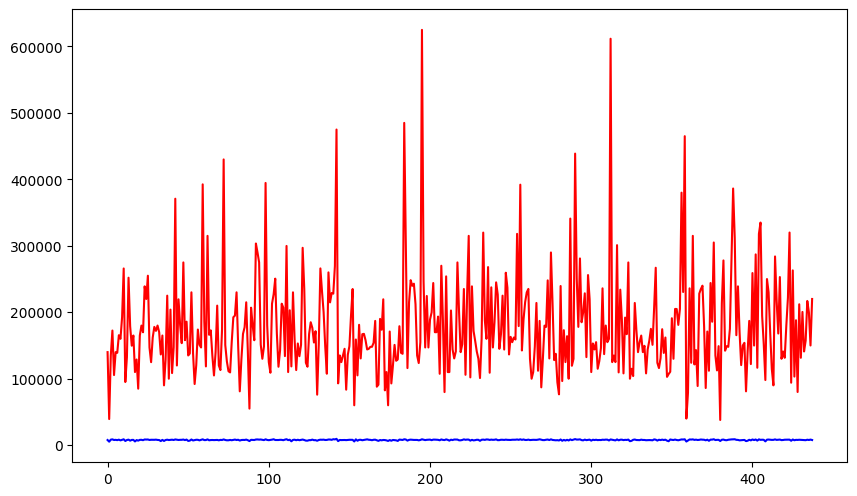

In [51]:
X = train_df.drop(["SalePrice","Id"], axis=1)
Y = train_df["SalePrice"]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

regr = LinearSVR(max_iter=1000)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print(regr.score(x_train, y_train))

plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('all_start_scaling.png')
plt.show()

In [49]:
X_test =  test_df.drop("Id", axis=1)

regr.fit(X, Y)
Y_pred = regr.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': Y_pred})
output.to_csv('original2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


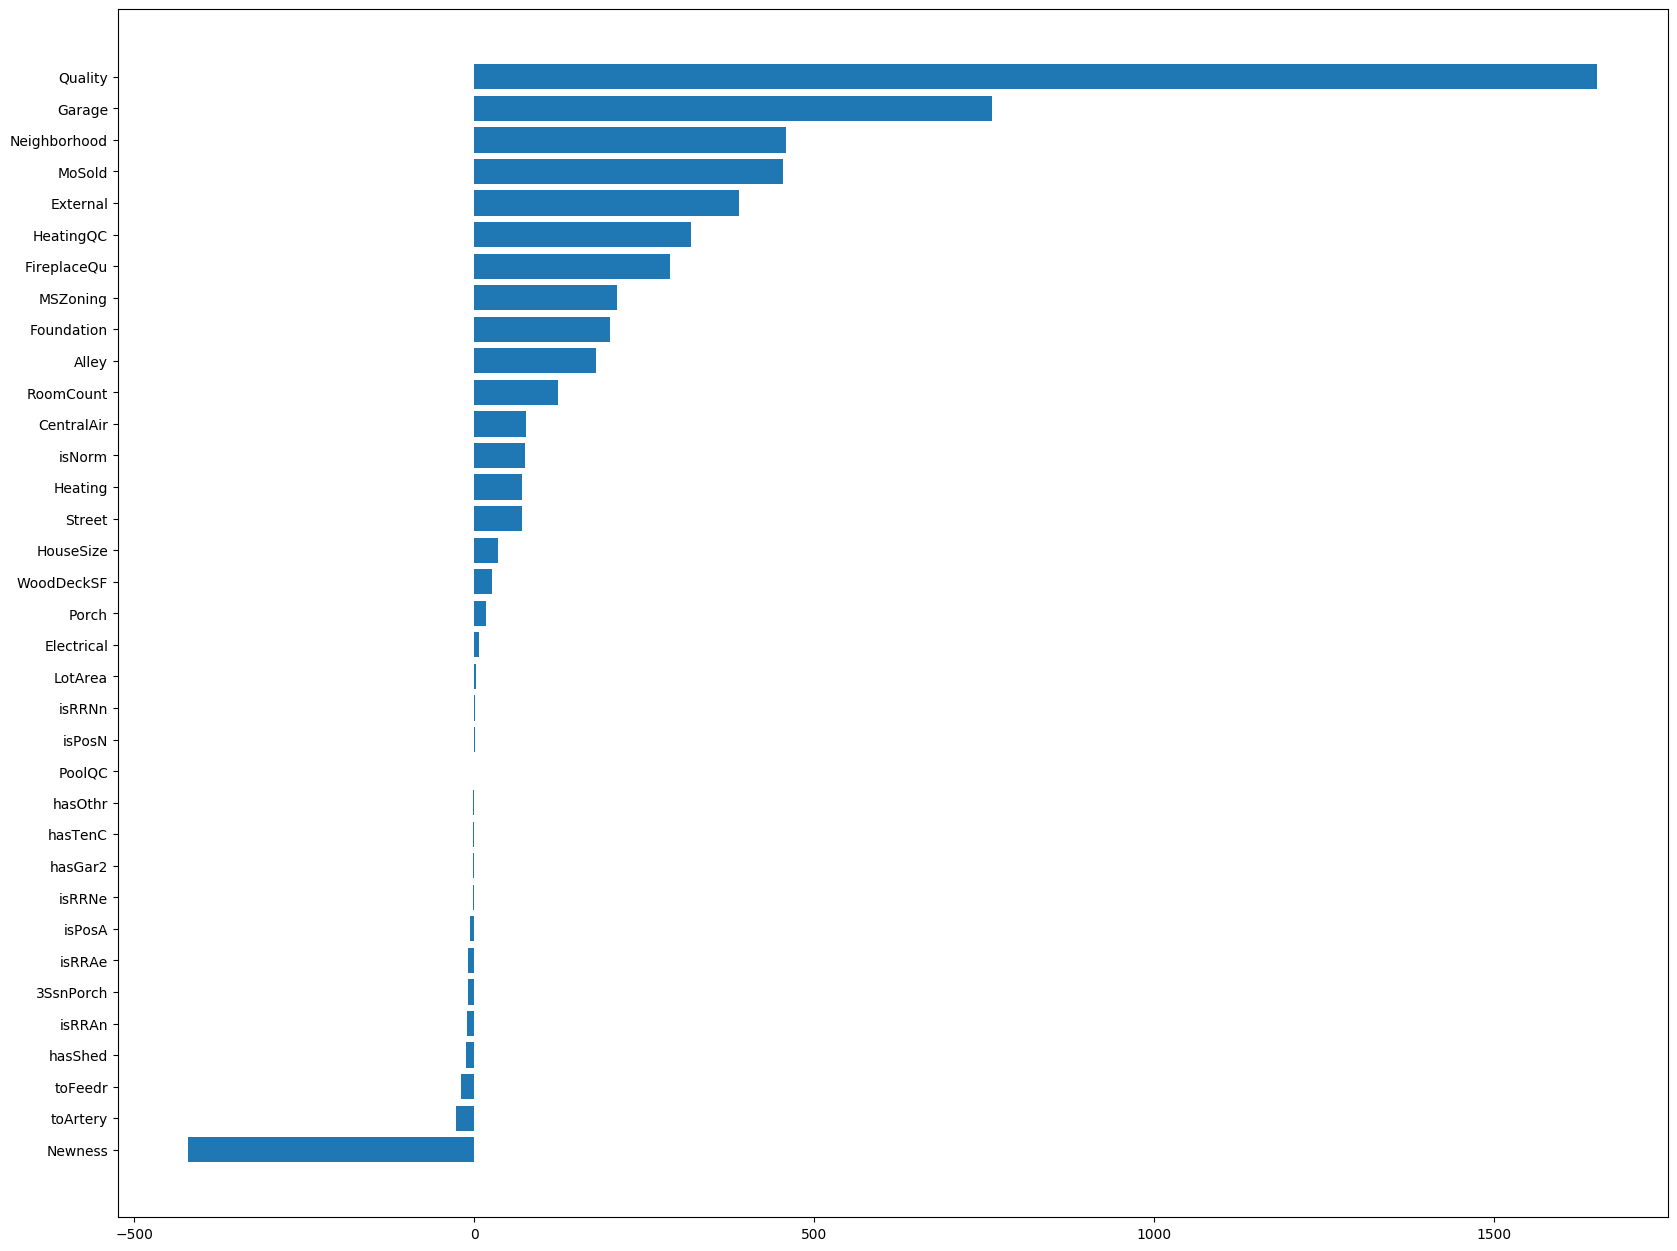

In [33]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,16), dpi=100)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = train_df.drop(["SalePrice","Id"], axis=1).columns.values
f_importances(regr.coef_, features_names)